# This Notebook Contains House Price Dataset Preprocessing and Feature Engineering along with House Price Prediction with help of Regression Techniques#

---

### Varun Sharma ##

### Email: varunvs.sharma344@gmail.com

###[Github](https://github.com/varun-122)



In [6]:
!gdown 1MbVUWjWJW02fgdSgknDY0K41tmVc1k-6 --output test.csv

!gdown 1erw9nuqEGkHyQMGaL0CaieuLZnwuHVMj --output train.csv


Downloading...
From: https://drive.google.com/uc?id=1MbVUWjWJW02fgdSgknDY0K41tmVc1k-6
To: /content/test.csv
100% 451k/451k [00:00<00:00, 27.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1erw9nuqEGkHyQMGaL0CaieuLZnwuHVMj
To: /content/train.csv
100% 461k/461k [00:00<00:00, 31.2MB/s]


### Data Preprocessing and Feature Engineering

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
sns.set_style('whitegrid')

In [9]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [10]:
train_df.shape

(1460, 81)

In [11]:
test_df.shape

(1459, 80)

In [12]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
print(train_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


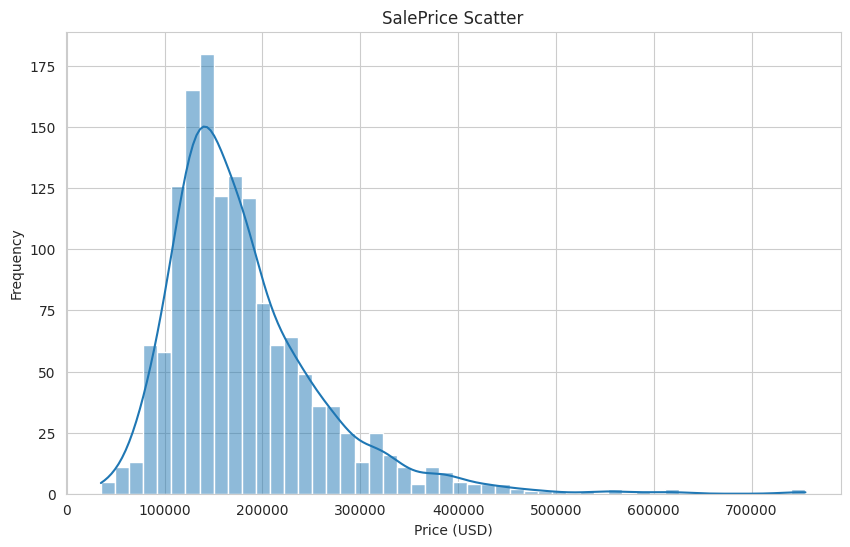

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=50)
plt.title('SalePrice Scatter')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

In [15]:
train_df['SalePrice_log'] = np.log1p(train_df['SalePrice'])

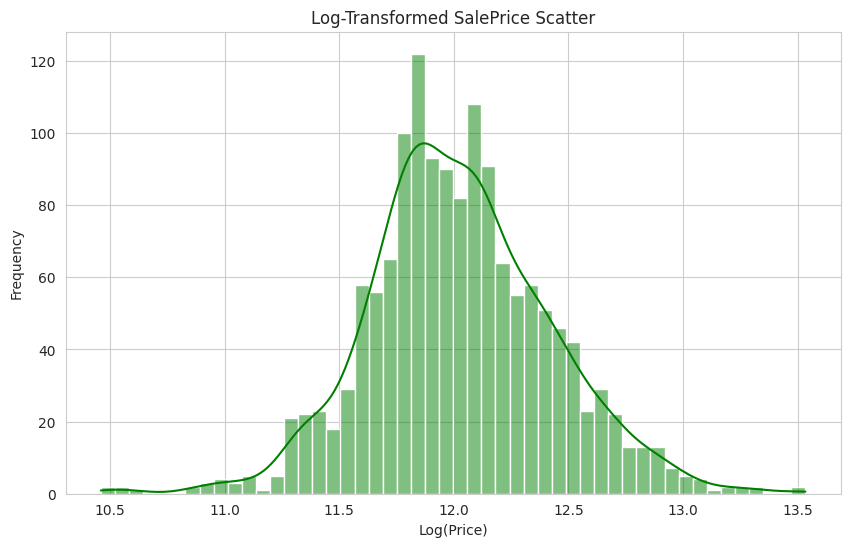

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice_log'], kde=True, bins=50, color='green')
plt.title('Log-Transformed SalePrice Scatter')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

In [17]:
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (train_df.isnull().sum() / len(train_df) * 100).sort_values(ascending=False)

In [18]:
missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total Missing', 'Percentage'])
print("Missing Value Columns:")
print(missing_data[missing_data['Total Missing'] > 0])

Missing Value Columns:
              Total Missing  Percentage
PoolQC                 1453   99.520548
MiscFeature            1406   96.301370
Alley                  1369   93.767123
Fence                  1179   80.753425
MasVnrType              872   59.726027
FireplaceQu             690   47.260274
LotFrontage             259   17.739726
GarageQual               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageType               81    5.547945
GarageCond               81    5.547945
BsmtExposure             38    2.602740
BsmtFinType2             38    2.602740
BsmtQual                 37    2.534247
BsmtFinType1             37    2.534247
BsmtCond                 37    2.534247
MasVnrArea                8    0.547945
Electrical                1    0.068493


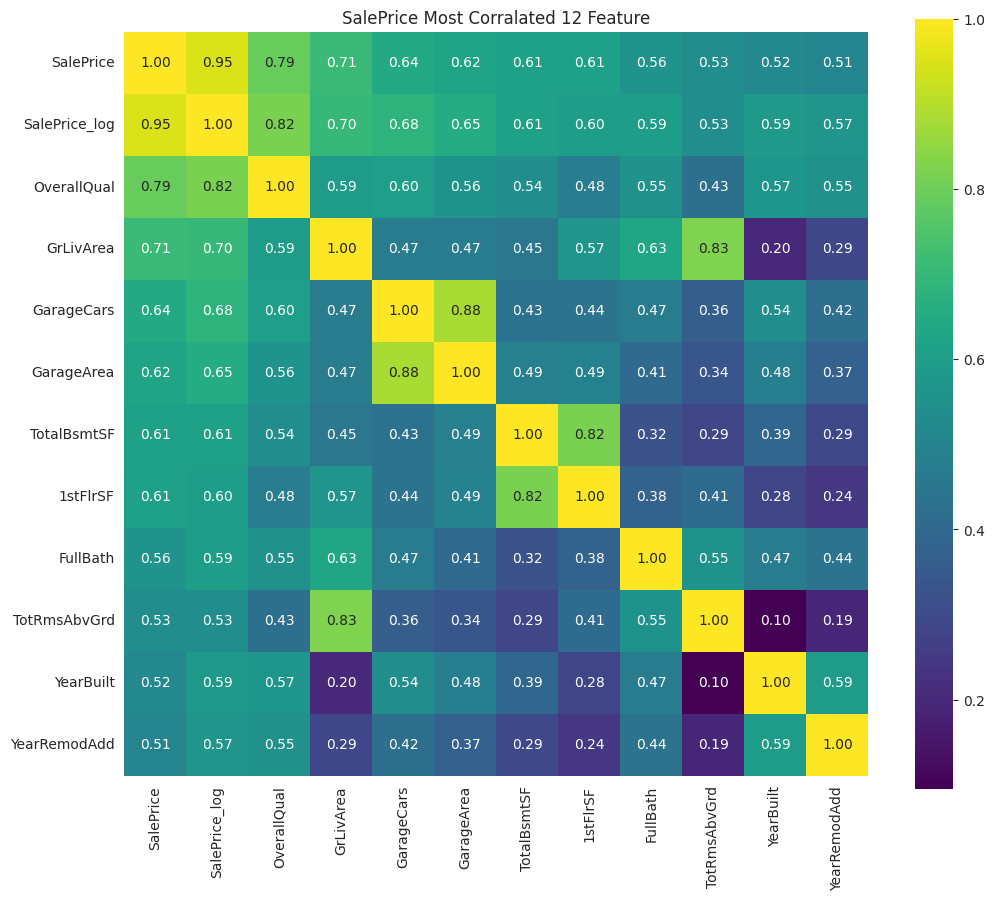

In [19]:
corrmat = train_df.corr(numeric_only=True)

k = 12
top_cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[top_cols].values.T)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, square=True, fmt='.2f',
            annot_kws={'size': 10}, yticklabels=top_cols.values, xticklabels=top_cols.values,
            cmap='viridis')
plt.title(f'SalePrice Most Corralated {k} Feature')
plt.show()

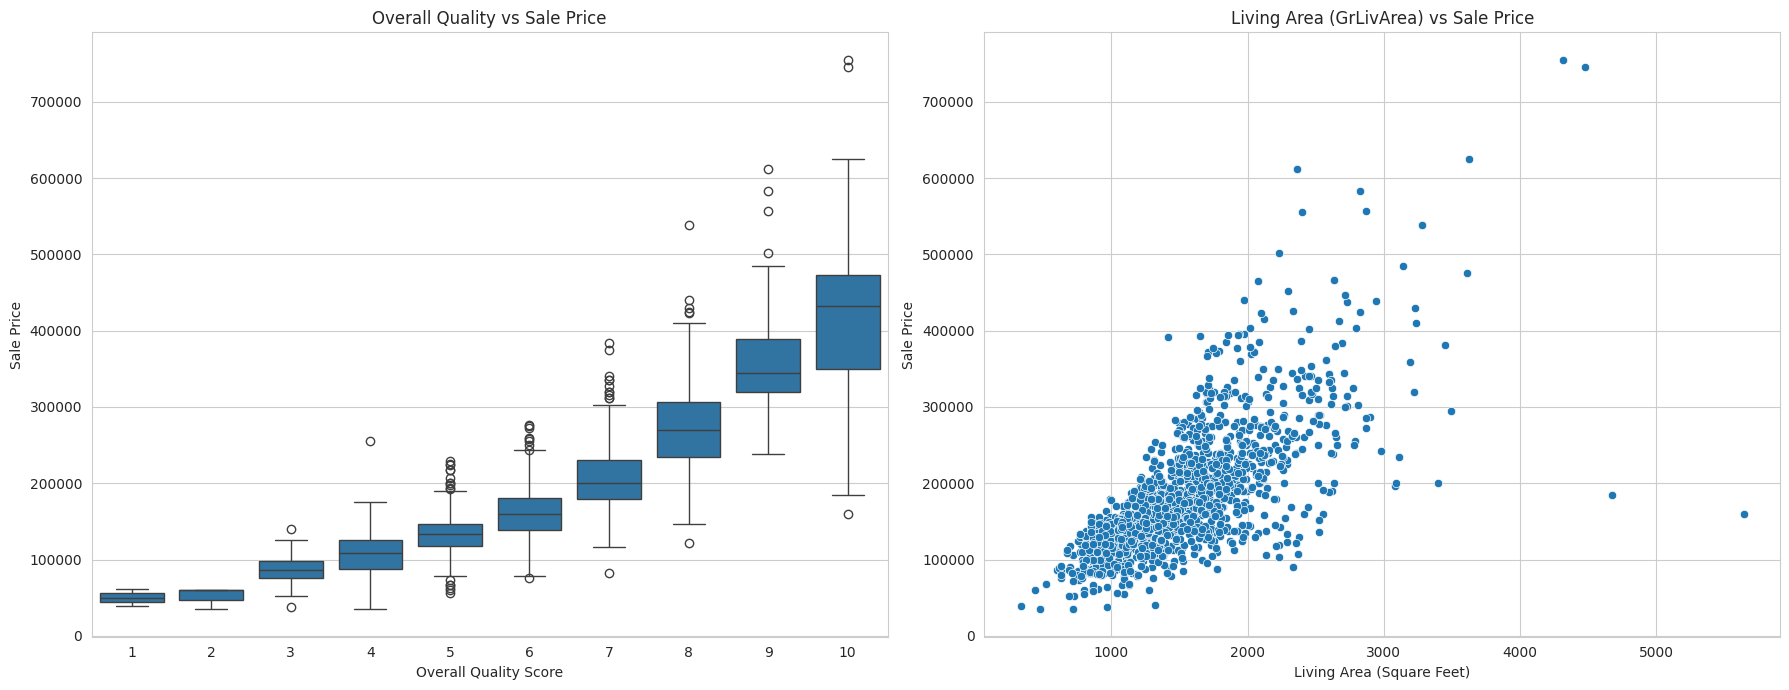

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.boxplot(x='OverallQual', y='SalePrice', data=train_df, ax=axes[0])
axes[0].set_title('Overall Quality vs Sale Price')
axes[0].set_xlabel('Overall Quality Score')
axes[0].set_ylabel('Sale Price')

sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df, ax=axes[1])
axes[1].set_title('Living Area (GrLivArea) vs Sale Price')
axes[1].set_xlabel('Living Area (Square Feet)')
axes[1].set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

### House Price Prediciton

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [23]:
df_1 = pd.read_csv("train.csv")
df_2 = pd.read_csv("test.csv")
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1, df_2], axis = 0)
df = df.set_index('Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
df_null  = df[df.isnull().sum()[df.isnull().sum()>0].index]
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


In [25]:
df_objects =  df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

In [26]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

df_objects = df_objects.fillna('null')

df_objects_encoded = pd.get_dummies(df_objects)

df_objects['Utilities'].value_counts()

,count
Utilities,
AllPub,2916
null,2
NoSeWa,1


In [27]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [28]:
new_df = pd.concat([df, df_objects_encoded], axis = 1)
len(new_df.columns)
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

In [29]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)

new_df.isna().sum()[new_df.isna().sum() > 0]

,0
LotFrontage,486
MasVnrArea,23
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFullBath,2
BsmtHalfBath,2
GarageYrBlt,159
GarageCars,1


In [33]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0]

,0


### Splitting Data

In [34]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]
testing_data = testing_data.drop(columns='SalePrice')

In [35]:
X = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
Y_train = np.reshape(Y_train,(-1, 1))
Y_test = np.reshape(Y_test,(-1, 1))
X_train.shape, Y_train.shape

((1168, 266), (1168, 1))

### Linear Regression

In [36]:
model_1 = LinearRegression()
model_1.fit(X, y)
y_pred = model_1.predict(X_test)
mean_squared_error(Y_test, y_pred)

497558959.1079459

### Random Forrest

In [39]:
model_2 = RandomForestRegressor(n_estimators=1000)
model_2.fit(X, y)
y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)

151165469.27504814

### Plotting Original vs Predicted Prices

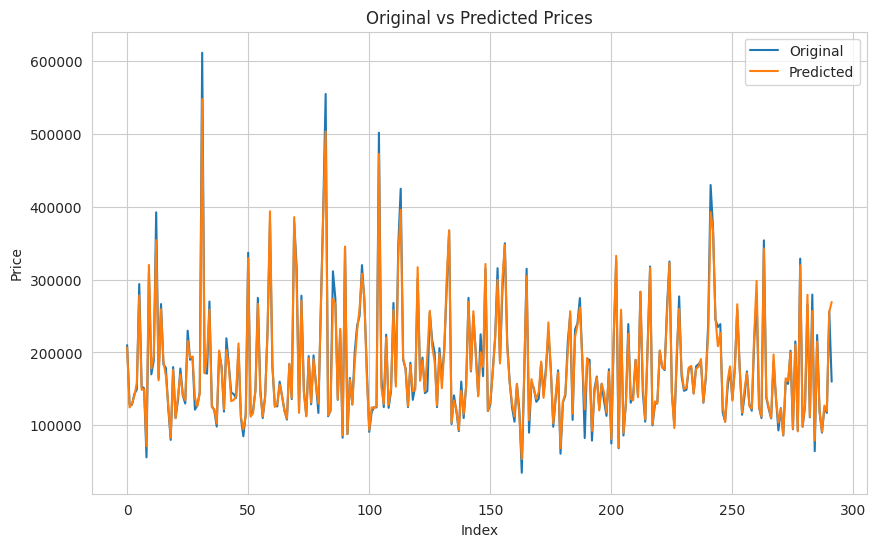

In [40]:
sort_indices = np.argsort(Y_test)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Original')
plt.plot(np.arange(len(Y_test)), y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.show()